In [81]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [83]:
df=pd.read_csv('uber_stock_data.csv')

In [84]:
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-05-10,41.570000,41.570000,45.000000,41.060001,42.000000,186322500
1,2019-05-13,37.099998,37.099998,39.240002,36.080002,38.790001,79442400
2,2019-05-14,39.959999,39.959999,39.959999,36.849998,38.310001,46661100
3,2019-05-15,41.290001,41.290001,41.880001,38.950001,39.369999,36086100
4,2019-05-16,43.000000,43.000000,44.060001,41.250000,41.480000,38115500
...,...,...,...,...,...,...,...
1439,2025-01-30,66.589996,66.589996,67.222000,63.419998,63.419998,33246500
1440,2025-01-31,66.849998,66.849998,67.870003,66.333000,67.089996,19805600
1441,2025-02-03,67.290001,67.290001,68.849998,65.178001,65.300003,25290000
1442,2025-02-04,69.750000,69.750000,70.190002,67.690002,67.690002,33786200


In [85]:
df.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [86]:
df.duplicated().sum()

0

Observation:
- No null values found
- no duplicate entries in the data

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1444 non-null   object 
 1   Adj Close  1444 non-null   float64
 2   Close      1444 non-null   float64
 3   High       1444 non-null   float64
 4   Low        1444 non-null   float64
 5   Open       1444 non-null   float64
 6   Volume     1444 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 79.1+ KB


Observation:
- only column Data is object type
- rest all are numerical columns

In [88]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [89]:
df.describe()

,Date,Adj Close,Close,High,Low,Open,Volume
count,1444,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1.444000e+03
mean,2022-03-22 02:49:31.745152256,44.465374,44.465374,45.287511,43.643301,44.493022,2.429800e+07
min,2019-05-10 00:00:00,14.820000,14.820000,17.799999,13.710000,15.960000,3.380000e+06
25%,2020-10-13 18:00:00,31.930000,31.930000,32.653749,31.181250,31.867499,1.498905e+07
50%,2022-03-21 12:00:00,41.355001,41.355001,41.910000,40.518499,41.215000,2.036965e+07
75%,2023-08-28 06:00:00,54.719999,54.719999,55.635001,53.597502,54.664999,2.843280e+07
max,2025-02-05 00:00:00,86.339996,86.339996,87.000000,84.180000,85.639999,3.642318e+08
std,NaN,15.594262,15.594262,15.740825,15.482652,15.643967,1.774084e+07


In [90]:
df['Date'].max(), df['Date'].min()

(Timestamp('2025-02-05 00:00:00'), Timestamp('2019-05-10 00:00:00'))

The dataset contains entries fro, 10 May 2019 to 5 Feb 2025

In [91]:
numerical_cols = df.columns[1:]

In [92]:
numerical_cols

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

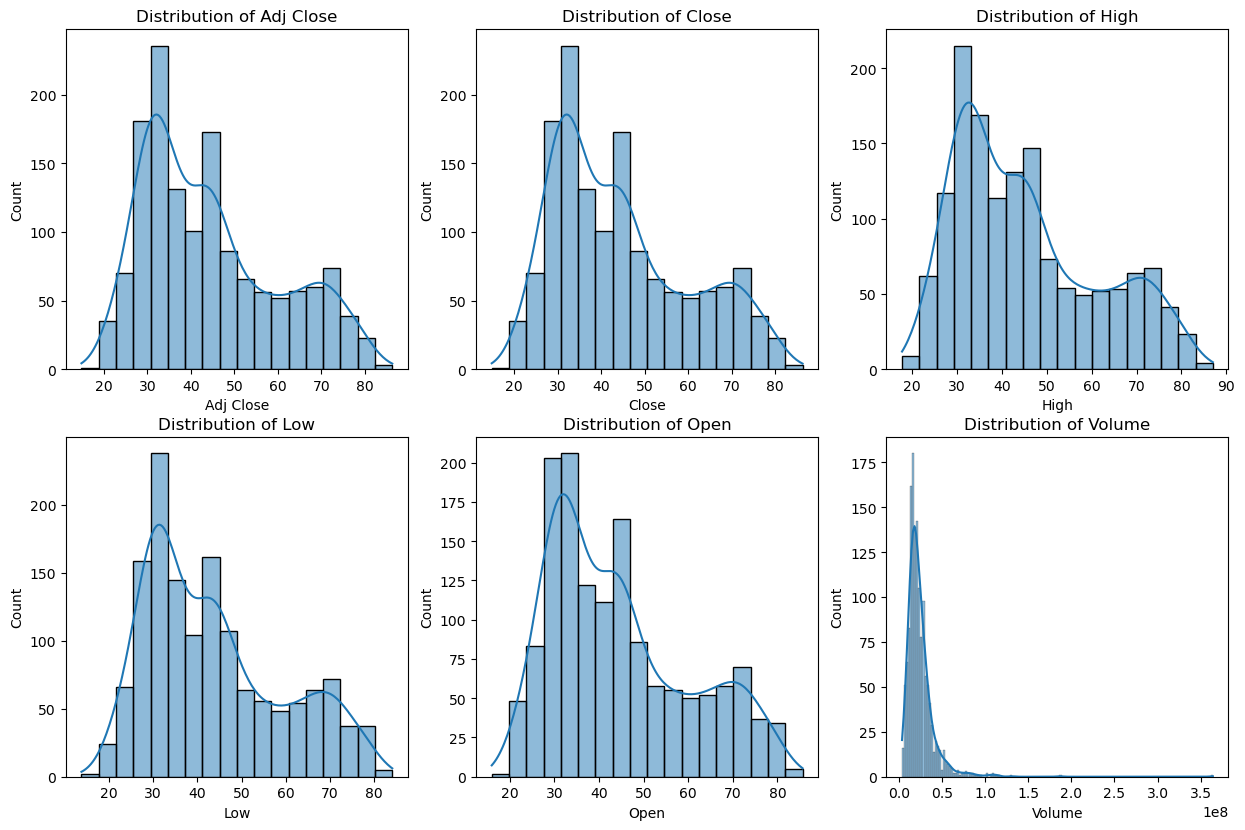

In [93]:
plt.figure(figsize=(15,15))
for i,col in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    plt.title(f'Distribution of {col}')
    sns.histplot(df[col], kde=True)
plt.show()

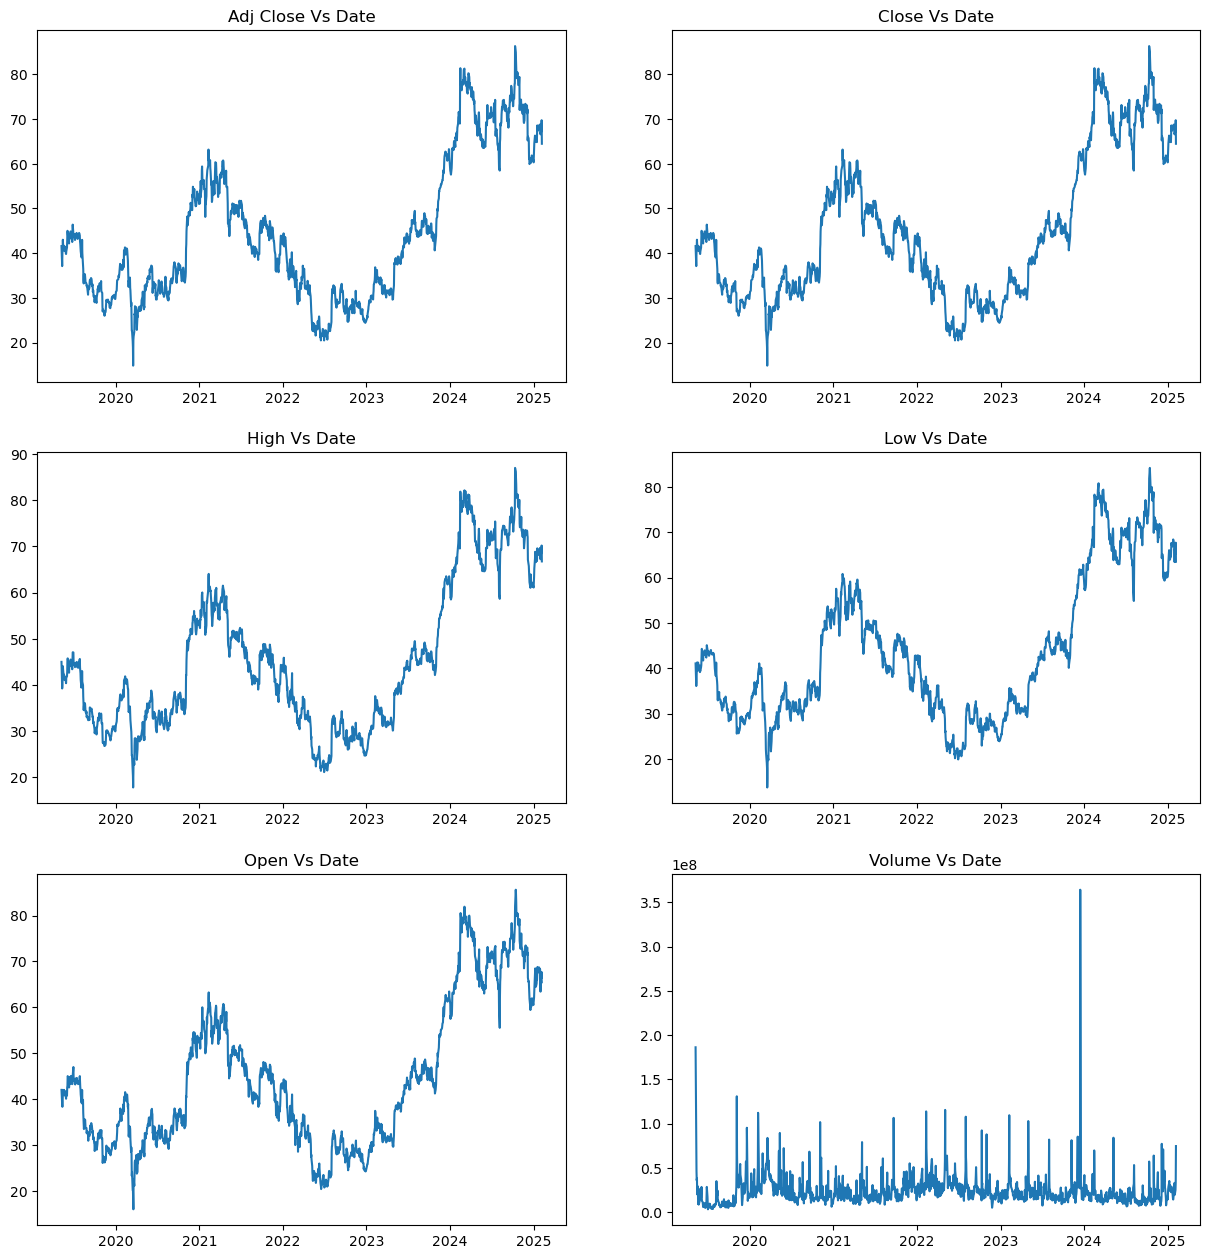

In [94]:
plt.figure(figsize=(15,21))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,2,i+1)
    plt.title(f'{col} Vs Date')
    plt.plot(df['Date'], df[col])
plt.show()

Observation:
- Prices are increasing from 2024

### Checking Stationarity

- The ADF test is a statistical test used to check whether a time series is stationary or non-stationary. Specifically, it tests the null hypothesis that the time series has a unit root (i.e., it is non-stationary).
- If the p-value from the ADF test is less than a certain significance level (usually 0.05), then the null hypothesis of non-stationarity is rejected, meaning the time series is stationary.

In [95]:
def test_stationarity(timeseries):
    # Rollin statistics
    rolling_mean = timeseries.rolling(12).mean()   # Moving Average
    rolling_std = timeseries.rolling(12).std()
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='green', label='Rolling Std.')
    plt.title('Rolling Mean adn Standard Deviation')
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries, autolag='AIC')
#     print(adft)
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

Results of dickey fuller test
Test Statistics                  -1.281692
p-value                           0.637506
No. of lags used                  1.000000
Number of observations used    1442.000000
critical value (1%)              -3.434893
critical value (5%)              -2.863546
critical value (10%)             -2.567838
dtype: float64


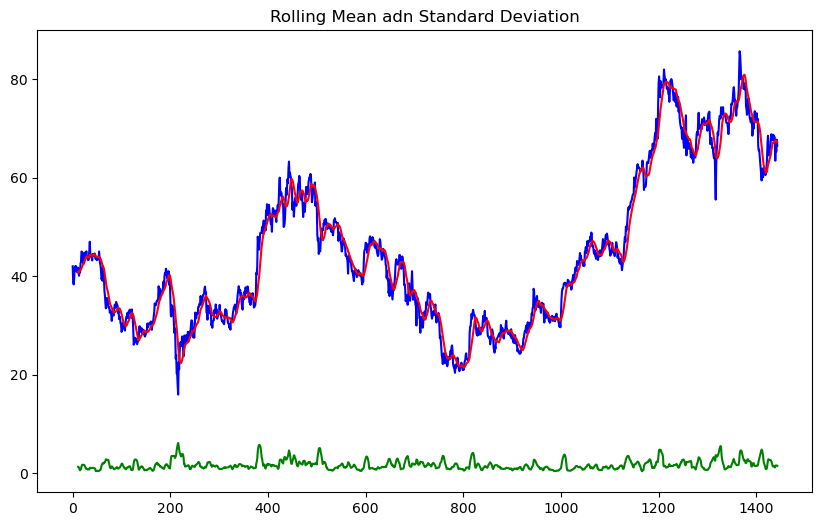

In [96]:
test_stationarity(df['Open'])

Observation:
- Through the above graph, we can see the increasing mean and standard deviation and hence our series is not stationary.

- We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

- In order to perform a time series analysis, we need to make our data stationary

<Figure size 1000x600 with 0 Axes>

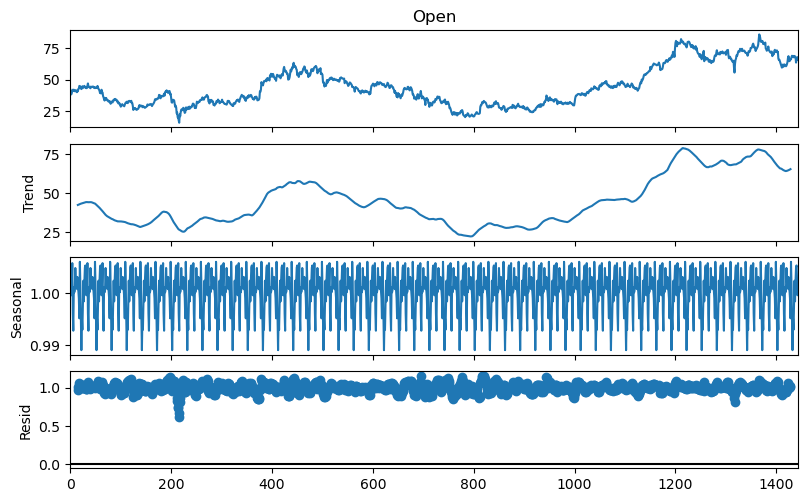

In [97]:
# Decompose the series to separate the trend and the seasonality from a time series, 
result = seasonal_decompose(df['Open'], model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(8, 5)

In [98]:
def test_stationarity(timeseries):
    
    # Transformation to make the data stationary
    timeseries_log = np.log(timeseries)
    timeseries_log_diff = timeseries_log.diff().dropna()

    # Determing rolling statistics
    rolmean = timeseries_log_diff.rolling(window=12).mean()
    rolstd = timeseries_log_diff.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(6, 4))
    plt.plot(timeseries_log_diff, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Log-Difference')
    plt.show()

    # Perform ADF test
    adft = adfuller(timeseries_log_diff, autolag='AIC')

    # Output the ADF test results
    output = pd.Series(adft[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in adft[4].items():
        output[f'Critical Value ({key})'] = value
    print(output)

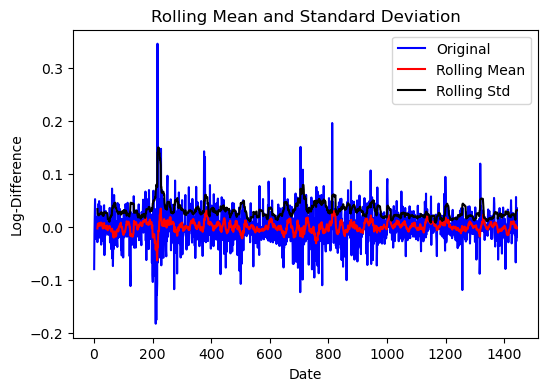

Test Statistic                -1.377886e+01
p-value                        9.378128e-26
Number of Lags Used            8.000000e+00
Number of Observations Used    1.434000e+03
Critical Value (1%)           -3.434918e+00
Critical Value (5%)           -2.863558e+00
Critical Value (10%)          -2.567844e+00
dtype: float64


In [99]:
test_stationarity(df['Open'])

- Based on the ADF test results above, the test statistic is significantly lower than the critical values at all levels of significance (1%, 5%, and 10%). Additionally, the p-value is very close to zero, indicating strong evidence against the null hypothesis of non-stationarity.

- Therefore, based on these results, we can conclude that the time series is stationary after the transformation.

## Model Fitting

In [100]:
def moving_avg_prediction(data):
    shape = data.shape[0]
    df_new = data[['Open']]
    df_new['Open'] = np.log(df_new['Open'])  # Apply logarithmic transformation
    
    train_set = df_new.iloc[:math.ceil(shape * 0.9)]
    valid_set = df_new.iloc[math.ceil(shape * 0.9):]
    print('----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------')
    print('----------------------------------------------------------')
    print('Shape of Training Set:', train_set.shape)
    print('Shape of Validation Set:', valid_set.shape)
    training = train_set['Open']
    validation = valid_set['Open']
    model = auto_arima(training, start_p=0, start_q=0, max_p=3, max_q=3, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)
    model.fit(training)
    forecast = model.predict(n_periods=len(validation))
    forecast.index = validation.index
    forecast = pd.DataFrame(forecast,columns =['Prediction'])
    #forecast = pd.DataFrame(forecast, index=valid_set.index, columns=['Prediction'])
    rms = np.sqrt(np.mean(np.power((np.array(validation) - np.array(forecast['Prediction'])), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    
    plt.figure(figsize=(8, 4))
    plt.plot(train_set['Open'])
    plt.plot(valid_set['Open'])
    plt.plot(forecast['Prediction'])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Auto ARIMA', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])

In [101]:
df.set_index('Date',inplace=True)

----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------
----------------------------------------------------------
Shape of Training Set: (1300, 1)
Shape of Validation Set: (144, 1)
Performing stepwise search to minimize aic


C:\Users\Admin\AppData\Local\Temp\ipykernel_5728\3339087187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Open'] = np.log(df_new['Open'])  # Apply logarithmic transformation
D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5015.704, Time=0.34 sec


D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5021.145, Time=0.34 sec


D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5020.379, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5017.527, Time=0.19 sec


D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5022.503, Time=0.57 sec


D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-5020.916, Time=0.43 sec


D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5020.452, Time=1.11 sec


D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5021.018, Time=0.61 sec


D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-5018.892, Time=0.46 sec


D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-5024.316, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-5022.934, Time=0.16 sec


D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-5022.736, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-5022.223, Time=0.16 sec


D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-5022.795, Time=0.15 sec


D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-5020.712, Time=0.67 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 6.331 seconds


D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


RMSE value on validation set: 0.0824339078075049
-----------------------------------------------------------
-----------------------------------------------------------


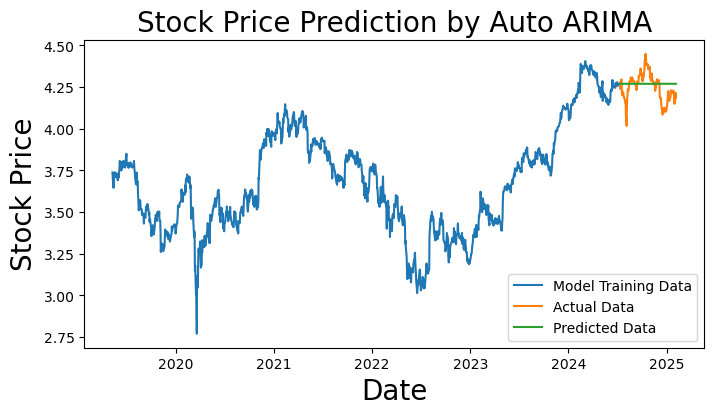

In [102]:
moving_avg_prediction(df)